In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('../data/rawdata/train.csv')
df_test = pd.read_csv('../data/rawdata/test.csv')

## Drop the column 'Id' from the data
# df = df.drop(['ID'], axis=1)
# df_test = df_test.drop(['ID'], axis=1)

### 1. Handle abnormal data
1. 5th row: Extreme outlier in `value` and influential point at `arces`
2. 1st row: `NA` in `bath`, imputation option:
  - mode = 2
  - mean = 2.02
  - median = 2
  - Average NN of `K = 5` = 2.0227
  - **Fill the missing value with `Baths=2`**

In [8]:
## 1. Delete the potential error data - ID = 5
df = df[df['ID'] != 5]
## 2. Fill the missing data with the mean `bath` = 2
df['Baths'] = df['Baths'].fillna(2)

### 2. Handle out-of-distribution data
There is another outlier that has large `value` but it is an influential point for predictor `sqft`. While all point in test set are within Q1-Q3 range of training set. This point is removed from the training set.

In [9]:
## 1. Delete the outlier: ID = 78
df = df[df['ID'] != 78]

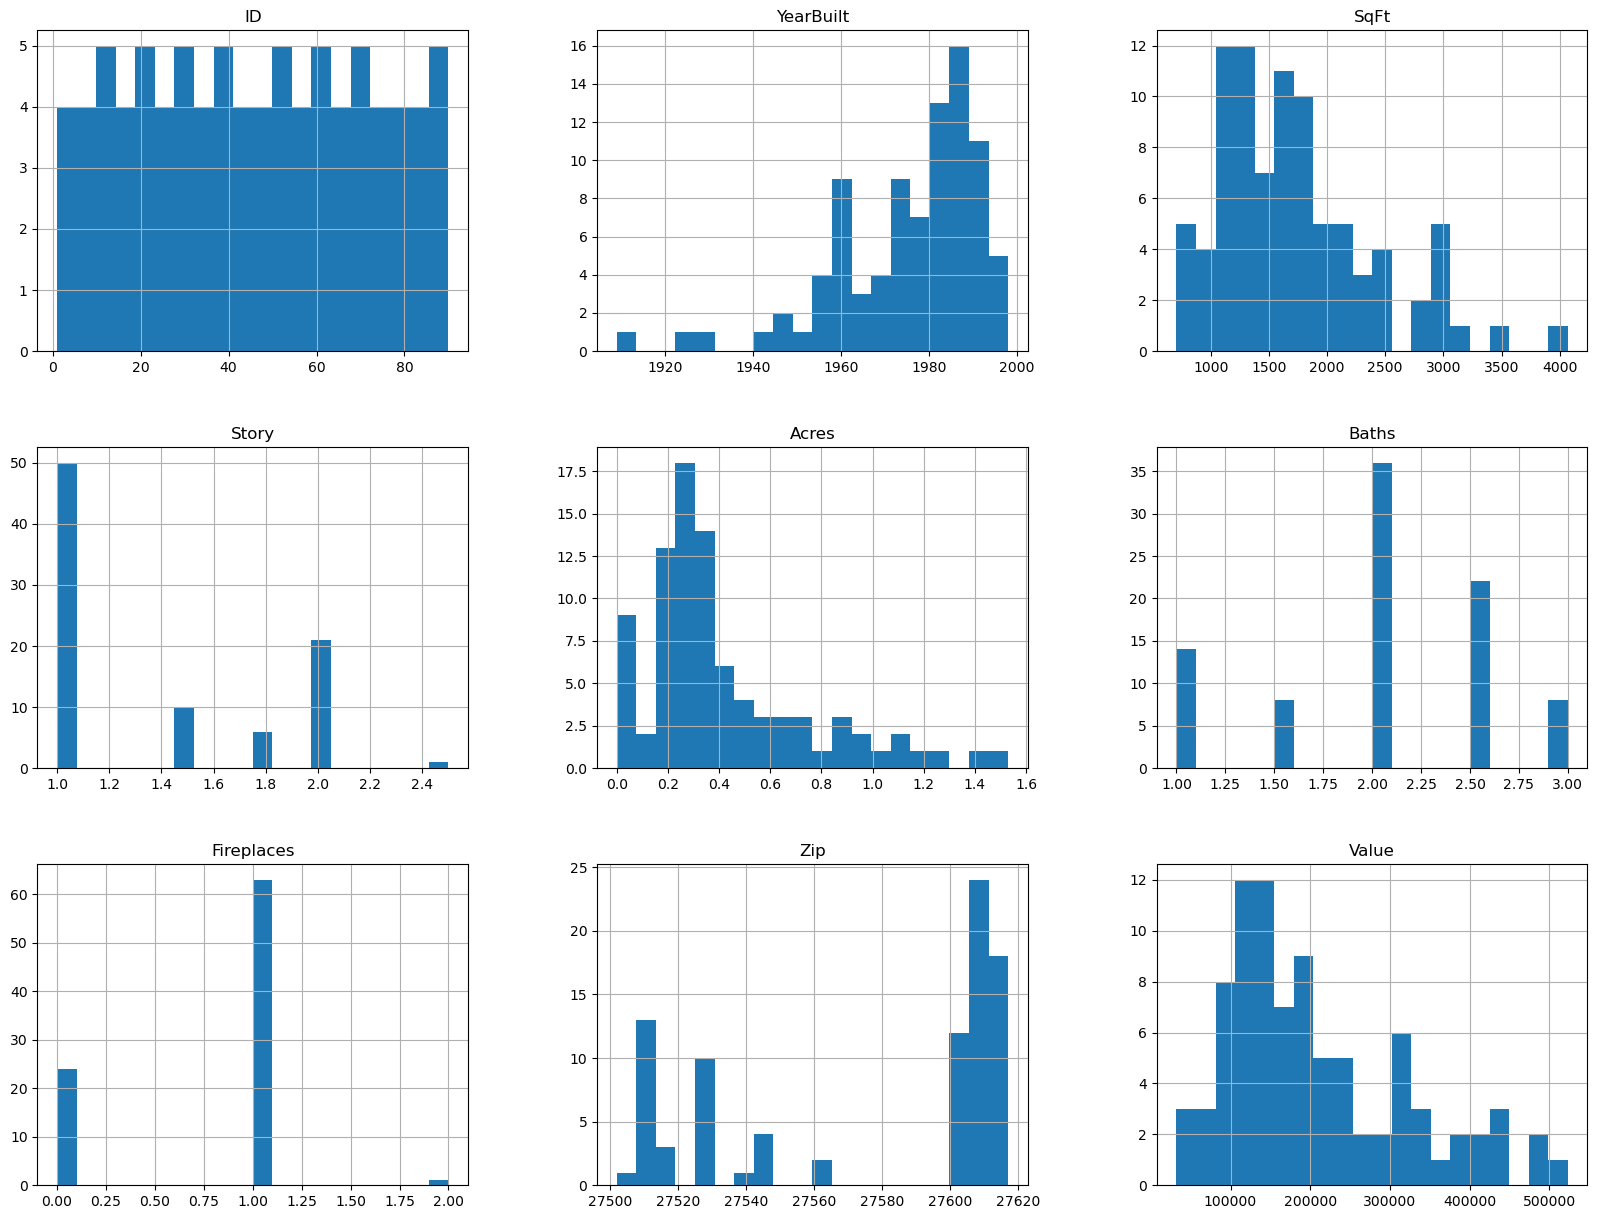

In [11]:
# Plot the distribution of data
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [12]:
# Save the cleaned data
## Save_path = '../data/cleandata/train.csv'
import os
if not os.path.exists('../data/cleandata'):
    os.makedirs('../data/cleandata')
df.to_csv('../data/cleandata/train.csv', index=False)
